In [0]:
from google.colab import drive

In [0]:
import numpy as np
import time
import pandas as pd
import glob as glob
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from keras.layers import Dense, Activation, Flatten, Reshape, ZeroPadding2D
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

In [0]:
%matplotlib inline

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/dl/faces94'

In [0]:
images_path = glob.glob(path+'/*/*/*.jp*g')

In [0]:
randidx1 = np.random.randint(len(images_path))
randidx2 = np.random.randint(len(images_path))

In [0]:
rand_image1 = plt.imread(images_path[randidx1])
rand_image2 = plt.imread(images_path[randidx2])

In [0]:
image_shape = rand_image1.shape

In [12]:
rand_image2.shape

(200, 180, 3)

In [0]:
transformed_shape = (128, 128, 3)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


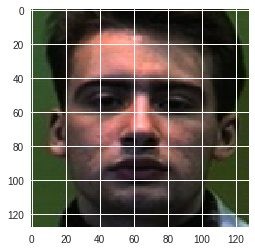

In [14]:
plt.imshow(resize(image=rand_image1, output_shape=transformed_shape))

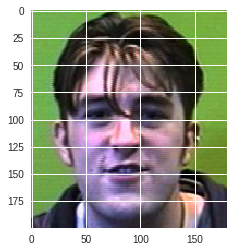

In [15]:
plt.imshow(rand_image2)

In [0]:
vector_size=np.prod(transformed_shape)

In [0]:
image_vectors = np.empty((len(images_path), vector_size))
images = np.empty((len(images_path), *transformed_shape))
# images = np.empty((1000, *transformed_shape))

In [18]:
for i in range(len(images_path)):
  image=plt.imread(images_path[i])
  image=resize(image, output_shape=transformed_shape)
  images[i]=image
  image_vectors[i]=image.reshape((vector_size))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

In [0]:
# images = scale(images, -1, 1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(images, images, test_size=0, random_state=42)

In [0]:
X_train_vector, X_test_vector, y_train_vector, y_test_vector=train_test_split(image_vectors, image_vectors, test_size=0, random_state=42)

In [24]:
X_train

array([[[[2.23713235e-01, 3.41360294e-01, 1.45281863e-01],
         [2.26838235e-01, 3.44485294e-01, 1.48406863e-01],
         [2.30759804e-01, 3.48406863e-01, 1.52328431e-01],
         ...,
         [2.51277191e-01, 3.68862975e-01, 1.57098269e-01],
         [2.50061275e-01, 3.67708333e-01, 1.55943627e-01],
         [2.42300475e-01, 3.59947534e-01, 1.48182828e-01]],

        [[2.32169118e-01, 3.49816176e-01, 1.53737745e-01],
         [2.35294118e-01, 3.52941176e-01, 1.56862745e-01],
         [2.39215686e-01, 3.56862745e-01, 1.60784314e-01],
         ...,
         [2.33182062e-01, 3.47510723e-01, 1.35746017e-01],
         [2.32971431e-01, 3.47309666e-01, 1.35544960e-01],
         [2.29473039e-01, 3.43811275e-01, 1.32046569e-01]],

        [[2.16745175e-01, 3.34392233e-01, 1.38313802e-01],
         [2.19433594e-01, 3.37080653e-01, 1.41002221e-01],
         [2.21936275e-01, 3.39583333e-01, 1.43504902e-01],
         ...,
         [2.29080499e-01, 3.35085401e-01, 1.27180990e-01],
         [

In [25]:
X_train_vector

array([[0.22371324, 0.34136029, 0.14528186, ..., 0.16417547, 0.12495979,
        0.0857441 ],
       [0.4375    , 0.67279412, 0.28063725, ..., 0.35069508, 0.45265587,
        0.1114794 ],
       [0.34946959, 0.5612343 , 0.2239794 , ..., 0.28654067, 0.39021714,
        0.1263691 ],
       ...,
       [0.4921358 , 0.73919462, 0.31958678, ..., 0.41115196, 0.53664216,
        0.14840686],
       [0.29129902, 0.49522059, 0.20502451, ..., 0.13611366, 0.16405484,
        0.05327053],
       [0.15373775, 0.25177696, 0.1341299 , ..., 0.81180875, 0.88891314,
        0.97655484]])

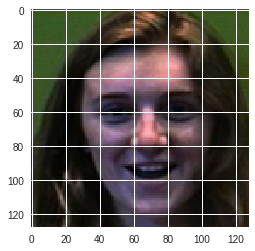

In [26]:
plt.imshow(X_train[0])

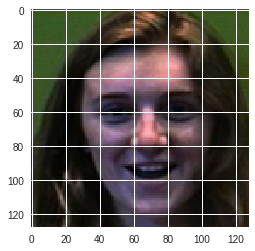

In [27]:
plt.imshow(X_train_vector[0].reshape(transformed_shape))

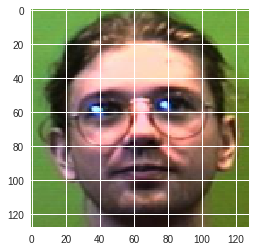

In [28]:
plt.imshow(X_train[1])

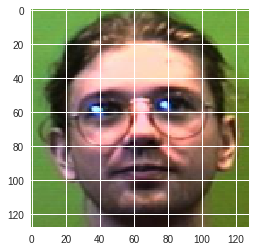

In [29]:
plt.imshow(X_train_vector[1].reshape(transformed_shape))

In [0]:
vector_size=np.prod(transformed_shape)

In [0]:
encoding_dim=100

In [0]:
class AutoGan(object):
  def __init__(self, img_rows=128, img_cols=128, channel=3):

        self.img_rows = img_rows
        self.img_cols = img_cols
        self.channel = channel
        self.D = None   # discriminator
        self.G = None   # generator
        self.AM = None  # adversarial model
        self.DM = None  # discriminator model
    
  def generator(self):
      model = Sequential()
      model.add(Conv2D(16, kernel_size = 3, input_shape = (128, 128, 3), padding = "same"))
      model.add(LeakyReLU(alpha = 0.2))
      model.add(MaxPooling2D(pool_size = (2, 2)))

      model.add(Conv2D(8, kernel_size = 3, padding = "same"))
      model.add(LeakyReLU(alpha = 0.2))
      model.add(MaxPooling2D(pool_size = (2, 2)))

      model.add(Conv2D(8, kernel_size = 3, padding = "valid"))
      model.add(LeakyReLU(alpha = 0.2))
      model.add(MaxPooling2D(pool_size = (2, 2)))

      model.add(Flatten())

      model.add(Dense(2048))
      model.add(Dense(100))
      model.add(Dense(4096))

      model.add(Reshape((4, 4, 256)))
      model.add(UpSampling2D())
      model.add(Conv2D(256, kernel_size = 3, padding = "same"))
      model.add(LeakyReLU(alpha = 0.2))
      model.add(UpSampling2D())
      model.add(Conv2D(16, kernel_size = 3, padding = "same"))
      model.add(LeakyReLU(alpha=0.2))
      model.add(UpSampling2D())
      model.add(Conv2D(16, kernel_size = 3, padding = "same"))
      model.add(LeakyReLU(alpha=0.2))
      model.add(UpSampling2D())
      model.add(Conv2D(3, kernel_size = 3, padding = "same"))
      model.add(LeakyReLU(alpha=0.2))
      model.add(UpSampling2D())
      model.add(Conv2D(3, kernel_size = 3, padding = "same"))

      model.summary()

      input = Input(shape = (128, 128, 3))
      generated_image = model(input)

      return Model(input, generated_image)

  def discriminator(self):
      model = Sequential()
      model.add(Conv2D(32, kernel_size = 3, strides = 2, input_shape = (128, 128, 3), padding = "same"))
      model.add(LeakyReLU(alpha = 0.2))

      model.add(Dropout(0.25))
      model.add(Conv2D(64, kernel_size = 3, strides = 2, padding = "same"))

      model.add(ZeroPadding2D(padding = ((0, 1), (0, 1))))
      model.add(BatchNormalization(momentum = 0.8))
      model.add(LeakyReLU(alpha = 0.2))

      model.add(Dropout(0.25))
      model.add(Conv2D(128, kernel_size = 3, strides = 2, padding = "same"))
      model.add(BatchNormalization(momentum = 0.8))
      model.add(LeakyReLU(alpha = 0.2))

      model.add(Dropout(0.25))
      model.add(Conv2D(256, kernel_size = 3, strides = 1, padding = "same"))
      model.add(BatchNormalization(momentum = 0.8))
      model.add(LeakyReLU(alpha = 0.2))

      model.add(Dropout(0.25))
      model.add(Conv2D(512, kernel_size = 3, strides = 1, padding = "same"))
      model.add(BatchNormalization(momentum = 0.8))
      model.add(LeakyReLU(alpha = 0.2))

      model.add(Dropout(0.25))
      model.add(Flatten())
      model.add(Dense(1, activation = 'sigmoid'))

      model.summary()

      input_image = Input(shape=(128, 128, 3))
      validity = model(input_image)

      return Model(input_image, validity)

  def combined(self, generator, discriminator):
      z = Input(shape = (128, 128, 3))
      gen_images = generator(z)
      discriminator.trainable = False
      valid = discriminator(gen_images)

      return Model(z, valid)

In [0]:
def train_gan(training_data, epochs, batch_size, interval):
    optimizer = Adam(0.0002, 0.5)
    autogan=AutoGan()
    gen = autogan.generator()
    discrm = autogan.discriminator()
    comb = autogan.combined(gen, discrm)
    comb.summary()

    discrm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    comb.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


    real_labels = numpy.ones((batch_size, 1))
    generated_labels = numpy.zeros((batch_size, 1))
    for epoch in tqdm(range(epochs)):
        random_noise_input = numpy.random.normal(0, 1, (batch_size, 128, 128, 3))

        generated_images = gen.predict(random_noise_input)
        discriminator_loss_real = discrm.train_on_batch(X_train[:batch_size], real_labels)
        discriminator_loss_fake = discrm.train_on_batch(generated_images, generated_labels)

        discriminator_loss = 0.5 * numpy.add(discriminator_loss_real, discriminator_loss_fake)
        generator_loss = comb.train_on_batch(random_noise_input, real_labels)

        if epoch % interval == 0:

            print ("%d [Discriminator Loss is: %f, acc.: %.2f%%] [Generator Loss is: %f]"
                    % (epoch, discriminator_loss[0], 100 * discriminator_loss[1], generator_loss[0]))

            rows, columns = 5, 5
            noise = numpy.random.normal(0, 1, (rows * columns, 128, 128, 3))
            generated_images = gen.predict(noise)
            generated_images = 0.5 * generated_images + 0.5

            figure, axis = plt.subplots(rows, columns)
            image_count = 0

            for row in range(rows):
                for column in range(columns):
                    axis[row,column].imshow(generated_images[image_count, :], cmap='spring')
                    axis[row,column].axis('off')
                    image_count += 1
                    
            figure.savefig("/content/drive/My Drive/generated_images_autogan/generated_%d.png" % epoch)
            plt.close()

In [48]:
epochs = 100
batch_size = 256
interval = 100
train_gan(images, epochs, batch_size, interval)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 128, 128, 16)      448       
_________________________________________________________________
leaky_re_lu_136 (LeakyReLU)  (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 64, 64, 8)         1160      
_________________________________________________________________
leaky_re_lu_137 (LeakyReLU)  (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 30, 30, 8)         584       
__________



  0%|          | 0/100 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
model_33 (Model)             (None, 128, 128, 3)       4939035   
_________________________________________________________________
model_34 (Model)             (None, 1)                 1720385   
Total params: 6,659,420
Trainable params: 4,939,035
Non-trainable params: 1,720,385
_________________________________________________________________
0 [Discriminator Loss is: 0.944696, acc.: 42.19%] [Generator Loss is: 0.694452]




  1%|          | 1/100 [00:16<26:46, 16.22s/it]

  2%|▏         | 2/100 [00:17<19:24, 11.89s/it]

  3%|▎         | 3/100 [00:19<14:17,  8.84s/it]

  4%|▍         | 4/100 [00:21<10:44,  6.71s/it]

  5%|▌         | 5/100 [00:23<08:17,  5.23s/it]

  6%|▌         | 6/100 [00:25<06:33,  4.19s/it]

  7%|▋         | 7/100 [00:26<05:22,  3.46s/it]

  8%|▊         | 8/100 [00:28<04:31,  2.95s/it]

  9%|▉         | 9/100 [00:30<03:55,  2.59s/it]

 10%|█         | 10/100 [00:32<03:30,  2.33s/it]

 11%|█         | 11/100 [00:33<03:12,  2.16s/it]

 12%|█▏        | 12/100 [00:35<02:58,  2.03s/it]

 13%|█▎        | 13/100 [00:37<02:49,  1.94s/it]

 14%|█▍        | 14/100 [00:38<02:42,  1.89s/it]

 15%|█▌        | 15/100 [00:40<02:36,  1.84s/it]

 16%|█▌        | 16/100 [00:42<02:32,  1.82s/it]

 17%|█▋        | 17/100 [00:44<02:29,  1.80s/it]

 18%|█▊        | 18/100 [00:45<02:26,  1.78s/it]

 19%|█▉        | 19/100 [00:47<02:23,  1.77s/it]

 20%|██        | 20/100 [00:49<02:20,  1.76s/it]

 21%|██